In [164]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import ast
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

In [165]:
df_data = pd.read_csv('dataset/ner.csv')
df_data.dropna(inplace=True)
df_data

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
...,...,...,...,...
47954,Sentence: 47955,Indian border security forces are accusing the...,"['JJ', 'NN', 'NN', 'NNS', 'VBP', 'VBG', 'PRP$'...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'B-gpe..."
47955,Sentence: 47956,Indian officials said no one was injured in Sa...,"['JJ', 'NNS', 'VBD', 'DT', 'NN', 'VBD', 'VBN',...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '..."
47956,Sentence: 47957,Two more landed in fields belonging to a nearb...,"['CD', 'JJR', 'VBD', 'IN', 'NNS', 'VBG', 'TO',...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
47957,Sentence: 47958,They say not all of the rockets exploded upon ...,"['PRP', 'VBP', 'RB', 'DT', 'IN', 'DT', 'NNS', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


In [166]:
def preprocess_data(data):
    for i in range(len(data)):
        pos = ast.literal_eval(data.loc[i, 'POS'])
        tags = ast.literal_eval(data.loc[i, 'Tag'])
        data.loc[i, 'POS'] = [str(word) for word in pos]
        data.loc[i, 'Tag'] = [str(word.upper()) for word in tags]
    return data

In [167]:
df_data = preprocess_data(df_data)
df_data.head()

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"[NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...","[O, O, O, O, O, O, B-GEO, O, O, O, O, O, B-GEO..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"[NNS, IN, NNS, VBN, IN, DT, NN, VBD, DT, NNS, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"[PRP, VBD, IN, DT, NNS, IN, NN, TO, DT, NN, IN...","[O, O, O, O, O, O, O, O, O, O, O, B-GEO, I-GEO..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","[NNS, VBD, DT, NN, IN, NNS, IN, CD, IN, NNS, V...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
4,Sentence: 5,The protest comes on the eve of the annual con...,"[DT, NN, VBZ, IN, DT, NN, IN, DT, JJ, NN, IN, ...","[O, O, O, O, O, O, O, O, O, O, O, B-GEO, O, O,..."


In [168]:
df_data_fix = df_data[['Sentence','Tag']]
df_data_fix

,Sentence,Tag
0,Thousands of demonstrators have marched throug...,"[O, O, O, O, O, O, B-GEO, O, O, O, O, O, B-GEO..."
1,Families of soldiers killed in the conflict jo...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2,They marched from the Houses of Parliament to ...,"[O, O, O, O, O, O, O, O, O, O, O, B-GEO, I-GEO..."
3,"Police put the number of marchers at 10,000 wh...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
4,The protest comes on the eve of the annual con...,"[O, O, O, O, O, O, O, O, O, O, O, B-GEO, O, O,..."
...,...,...
47954,Indian border security forces are accusing the...,"[B-GPE, O, O, O, O, O, O, B-GPE, O, O, O, O, O..."
47955,Indian officials said no one was injured in Sa...,"[B-GPE, O, O, O, O, O, O, O, B-TIM, O, O, O, O..."
47956,Two more landed in fields belonging to a nearb...,"[O, O, O, O, O, O, O, O, O, O, O]"
47957,They say not all of the rockets exploded upon ...,"[O, O, O, O, O, O, O, O, O, O, O]"


In [169]:
def count_entities(tags, entity):
    count = 0
    for tag in tags:
        if tag == entity:
            count += 1
    return count

def add_entity_tags(tags, entity):
    tags_set = set(tags)
    if "B-" + entity.upper() not in tags_set:
        tags_set.add("B-" + entity.upper())
    if "I-" + entity.upper() not in tags_set:
        tags_set.add("I-" + entity.upper())
    return list(tags_set)

def add_entity_counts(df, entities):
    for entity in entities:
        col_name = f"{entity.upper()}_Count"
        df[col_name] = df["Tag"].apply(lambda x: count_entities(x, entity))
        df["Tag"] = df["Tag"].apply(lambda x: add_entity_tags(x, entity))
        
def plot_entity_counts(df, entities):
    plt.figure(figsize=(10, 6))
    for entity in entities:
        col_name = f"{entity.upper()}_Count"
        plt.bar(entity, df[col_name].sum(), label=entity.upper())
    plt.xlabel('Entity')
    plt.ylabel('Total Count')
    plt.title('Total Count of Entities')
    plt.legend()
    plt.show()

In [170]:
entities = ["B-GEO","I-GEO", "B-GPE","I-GPE", "B-ORG","I-ORG","B-PER","I-PER","B-TIM","I-TIM","B-ART","I-ART","B-EVE","I-EVE","B-NAT","I-NAT"]
add_entity_counts(df_data, entities)

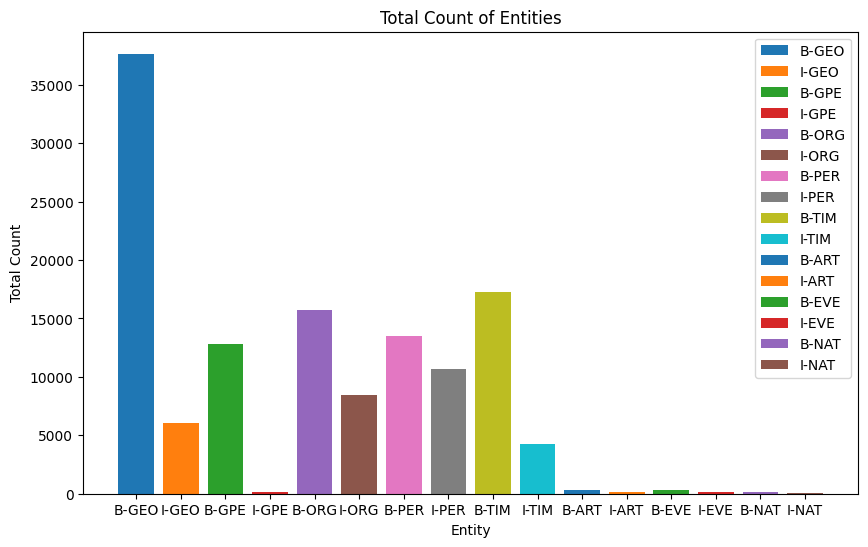

In [171]:
plot_entity_counts(df_data, entities)

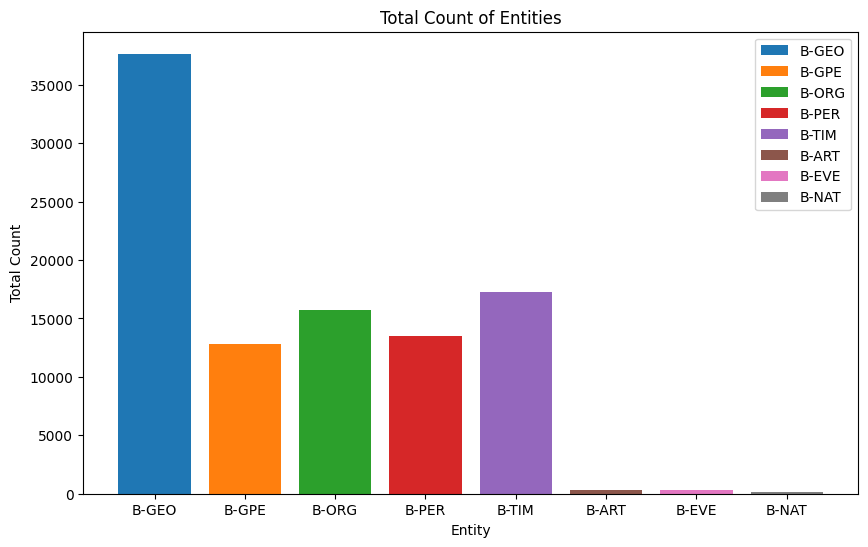

In [172]:
plot_entity_counts(df_data, ["B-GEO","B-GPE","B-ORG","B-PER","B-TIM","B-ART","B-EVE","B-NAT"])

In [173]:
x_train, x_test, y_train, y_test = train_test_split(df_data_fix['Sentence'], df_data_fix['Tag'], test_size=0.2, random_state=0)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=0)

x_train.shape, x_test.shape, x_val.shape

((38367,), (4796,), (4796,))

In [174]:
df_val = pd.DataFrame({'Sentence': x_val, 'Tag': y_val})
df_val.to_csv('dataset/val.csv', index=False)

In [175]:
EMBEDDING_DIM = 15
X_MAXLEN = max([len(s.split()) for s in x_train])
Y_MAXLEN = max([len(s) for s in y_train])
TRUNCATING = 'post'
PADDING = 'post'
OOV_TOKEN = "<OOV>"

print(X_MAXLEN, Y_MAXLEN)

104 104


In [176]:
x_tokenizer = Tokenizer(oov_token=OOV_TOKEN,lower=False, filters='')
x_tokenizer.fit_on_texts(x_train)

word_index = x_tokenizer.word_index
x_train_seq = x_tokenizer.texts_to_sequences(x_train)
x_train_pad = pad_sequences(x_train_seq, maxlen=X_MAXLEN, truncating=TRUNCATING, padding=PADDING)
x_test_seq = x_tokenizer.texts_to_sequences(x_test)
x_test_pad = pad_sequences(x_test_seq, maxlen=X_MAXLEN, truncating=TRUNCATING, padding=PADDING)

In [177]:
y_tokenizer = Tokenizer(lower=False)
y_tokenizer.fit_on_texts(y_train)

y_train_seq = y_tokenizer.texts_to_sequences(y_train)
y_train_pad = pad_sequences(y_train_seq, maxlen=Y_MAXLEN, truncating=TRUNCATING, padding=PADDING)
y_test_seq = y_tokenizer.texts_to_sequences(y_test)
y_test_pad = pad_sequences(y_test_seq, maxlen=Y_MAXLEN, truncating=TRUNCATING, padding=PADDING)

In [178]:
NUM_LABELS = len(y_tokenizer.word_index) + 1

In [179]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(len(word_index)+1, EMBEDDING_DIM, input_length=X_MAXLEN, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(NUM_LABELS, activation='softmax'))
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

C:\Users\Gede Darmawan\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_6              │ ?                      │   0 (unbuilt) │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [180]:
history = model.fit(x_train_pad, y_train_pad, epochs=10, batch_size=64, validation_data=(x_test_pad, y_test_pad))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 285s 445ms/step - accuracy: 0.1867 - loss: 0.9223 - val_accuracy: 0.1920 - val_loss: 0.3012
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 257s 428ms/step - accuracy: 0.1956 - loss: 0.2464 - val_accuracy: 0.2014 - val_loss: 0.1585
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 258s 430ms/step - accuracy: 0.2026 - loss: 0.1289 - val_accuracy: 0.2029 - val_loss: 0.1285
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 262s 437ms/step - accuracy: 0.2045 - loss: 0.0958 - val_accuracy: 0.2036 - val_loss: 0.1151
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 253s 421ms/step - accuracy: 0.2053 - loss: 0.0787 - val_accuracy: 0.2038 - val_loss: 0.1115
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 261s 436ms/step - accuracy: 0.2059 - loss: 0.0698 - val_accuracy: 0.2038 - val_loss: 0.1126
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 256s 427ms/step - accuracy: 0.2069 - loss: 0.0617 - val_accuracy: 0.2041 - val_loss: 0.1113
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 250s 417ms/step - accuracy: 0.2064 -

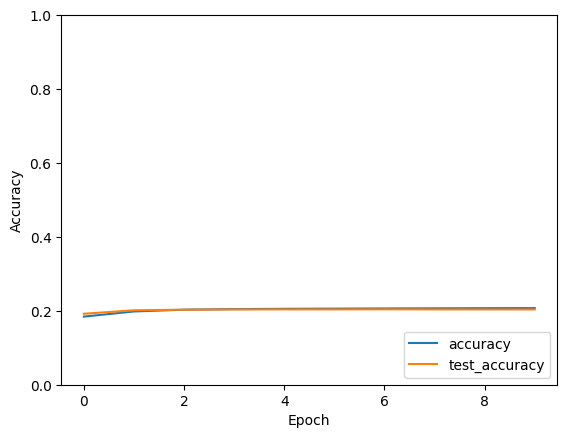

In [181]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [182]:
model.save('ner_model.h5')
with open('x_tokenizer.pickle', 'wb') as handle:
    pickle.dump(x_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('y_tokenizer.pickle', 'wb') as handle:
    pickle.dump(y_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)